In [1]:
import os
# Create a path to the pre-fire MODIS h4 data
modis_pre_path = os.path.join("G:\\",
                              "MODIS_ET",
                              "MOD16A2.A2018161.h25v07.006.2018179103116.hdf")
modis_pre_path

'G:\\MODIS_ET\\MOD16A2.A2018161.h25v07.006.2018179103116.hdf'

In [2]:
from osgeo import gdal
import pyproj
import numpy as np

FILE_NAME = modis_pre_path
DATAFIELD_NAME = 'ET_500m'
GRID_NAME = 'MOD_Grid_MOD16A2'  
gname = 'HDF4_EOS:EOS_GRID:"{0}":{1}:{2}'.format(FILE_NAME,
                                                 GRID_NAME,
                                                 DATAFIELD_NAME)
gdset = gdal.Open(gname)
data = gdset.ReadAsArray().astype(np.float64)


# Construct the grid.
x0, xinc, _, y0, _, yinc = gdset.GetGeoTransform()
nx, ny = (gdset.RasterXSize, gdset.RasterYSize)
x = np.linspace(x0, x0 + xinc*nx, nx)
y = np.linspace(y0, y0 + yinc*ny, ny)
xv, yv = np.meshgrid(x, y)

# In basemap, the sinusoidal projection is global, so we won't use it.
# Instead we'll convert the grid back to lat/lons.
sinu = pyproj.Proj("+proj=sinu +R=6371007.181 +nadgrids=@null +wktext")
wgs84 = pyproj.Proj("+init=EPSG:4326") 
lon, lat= pyproj.transform(sinu, wgs84, xv, yv)

# Read the attributes.
meta = gdset.GetMetadata()
long_name = meta['long_name']        
units = meta['units']
_FillValue = float(meta['_FillValue'])
scale_factor = float(meta['scale_factor'])
valid_range = [float(x) for x in meta['valid_range'].split(', ')] 

del gdset

invalid = np.logical_or(data > valid_range[1],
                            data < valid_range[0])
invalid = np.logical_or(invalid, data == _FillValue)
data[invalid] = np.nan
data = data * scale_factor 
data = np.ma.masked_array(data, np.isnan(data))

C:\Users\IITM\anaconda3\envs\gdal\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\IITM\AppData\Local\Temp\ipykernel_7340\409178539.py:26: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat= pyproj.transform(sinu, wgs84, xv, yv)


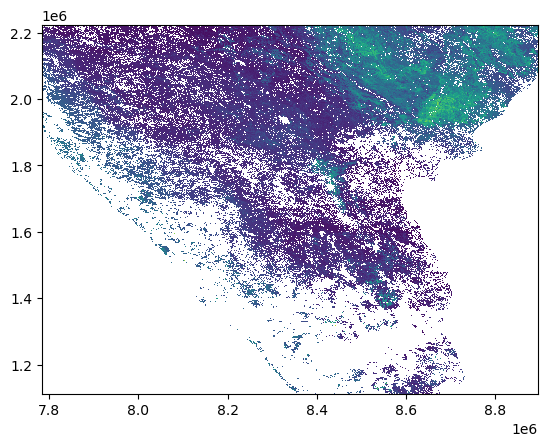

In [3]:
import matplotlib.pyplot as plt
plt.pcolormesh(x,y,data)

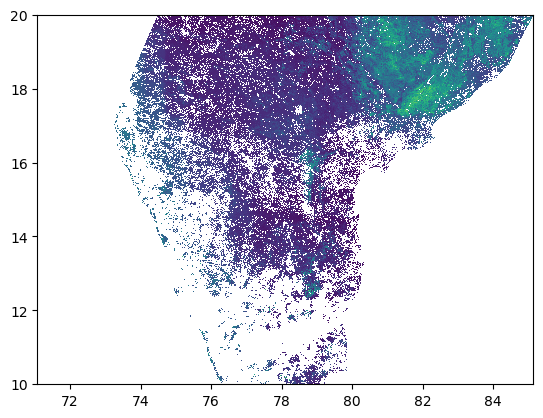

In [14]:
plt.pcolormesh(lon,lat,data)

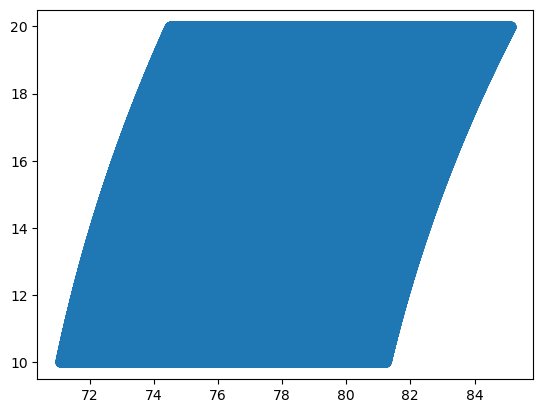

In [9]:
plt.scatter(lon,lat)

In [11]:
lon[0]

array([74.49244407, 74.49687999, 74.50131591, ..., 85.12534994,
       85.12978587, 85.13422179])